In [2]:
# imports

import pandas as pd
import numpy as np
import openml
from AdaBoostWorkyWorky import AdaBoost
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

In [3]:
# get the data from OpenML
# dataset from Task ID = 3904

suite = openml.study.get_suite(99)
task_id = 24
task = openml.tasks.get_task(task_id)    
dataset = openml.datasets.get_dataset(task.dataset_id)

X, y, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format="array", target=dataset.default_target_attribute
)

# Visualizar o dataset

df = pd.DataFrame(X, columns=attribute_names)
# converter:
#   0 -> -1
#   1 -> 1
df['target'] = 2*y-1 
df = df.dropna(how='any', axis=0)

X = df.drop(columns=['target'], axis=1)
y = df.target

df

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,target
0,5.0,2.0,4.0,1.0,6.0,2.0,0.0,1.0,4.0,0.0,...,7.0,7.0,0.0,2.0,1.0,5.0,2.0,3.0,5.0,1
1,5.0,2.0,9.0,1.0,0.0,2.0,0.0,0.0,4.0,0.0,...,7.0,7.0,0.0,2.0,1.0,5.0,3.0,2.0,1.0,-1
2,0.0,2.0,8.0,1.0,3.0,2.0,0.0,0.0,5.0,0.0,...,7.0,7.0,0.0,2.0,1.0,5.0,3.0,2.0,3.0,-1
3,5.0,3.0,8.0,1.0,6.0,2.0,0.0,1.0,5.0,0.0,...,7.0,7.0,0.0,2.0,1.0,5.0,2.0,3.0,5.0,1
4,5.0,2.0,3.0,0.0,5.0,2.0,2.0,0.0,4.0,1.0,...,7.0,7.0,0.0,2.0,1.0,1.0,3.0,0.0,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,0.0,3.0,4.0,0.0,5.0,2.0,0.0,0.0,10.0,0.0,...,4.0,4.0,0.0,2.0,2.0,5.0,7.0,5.0,4.0,-1
8001,5.0,3.0,4.0,0.0,5.0,2.0,0.0,0.0,10.0,0.0,...,4.0,4.0,0.0,2.0,2.0,5.0,7.0,5.0,4.0,-1
8038,5.0,3.0,3.0,1.0,5.0,2.0,0.0,0.0,10.0,0.0,...,7.0,7.0,0.0,2.0,2.0,5.0,7.0,5.0,4.0,-1
8095,5.0,3.0,1.0,0.0,4.0,2.0,0.0,0.0,11.0,0.0,...,1.0,1.0,0.0,2.0,0.0,4.0,7.0,1.0,0.0,1


In [4]:
models = [
    ("default", AdaBoost(0)),
    ("Alpha 1", AdaBoost(1)),
    ("Alpha 2", AdaBoost(2)),
    ("Alpha 3", AdaBoost(3))
]

models

[('default', <AdaBoostWorkyWorky.AdaBoost at 0x7faf09648e80>),
 ('Alpha 1', <AdaBoostWorkyWorky.AdaBoost at 0x7faf0d42b910>),
 ('Alpha 2', <AdaBoostWorkyWorky.AdaBoost at 0x7faf0d42b220>),
 ('Alpha 3', <AdaBoostWorkyWorky.AdaBoost at 0x7faf0d42b3a0>)]

In [5]:
# run cross-validation on an algorithm

def run_cv(X,y,algs,nfolds=10):
    results = {}
    kf = KFold(n_splits=nfolds, shuffle=True, random_state=1111)
    for algo_name, algo in algs:
        results[algo_name] = []
        for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            algo.fit(X_train, y_train)
            y_pred = algo.predict(X_test)
            results[algo_name].append(accuracy_score(y_test, y_pred))
    results_df = pd.DataFrame.from_dict(results)
    return results_df


In [6]:
results = run_cv(X, y, models)

results

ValueError: operands could not be broadcast together with shapes (2,) (5079,) 

In [ ]:
# Plot the results using a box plot

def plot_cv(results_cv,metric='Accuracy'):
    fig, ax = plt.subplots()
    ax.boxplot(results_cv)
    ax.set_xticklabels(results_cv.columns)
    ax.set_ylabel(metric)
    ax.set_title("Cross-validation results for multiple algorithms in a single task")
    plt.show()

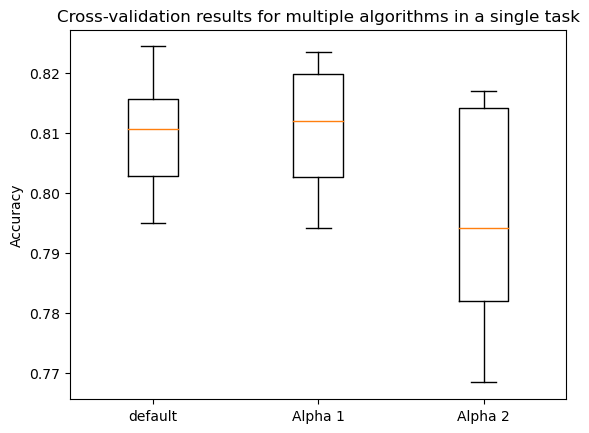

In [ ]:
plot_cv(results)

In [ ]:
# Plot the results using a bar plot with error bars
def plot_cv_estimates(results_cv,metric='Accuracy'):
    fig, ax = plt.subplots()
    ax.bar(results_cv.columns, results_cv.mean(), yerr=results_cv.std() / np.sqrt(results_cv.shape[0]), capsize=5)
    ax.set_ylabel(metric)
    ax.set_title("Cross-validation results for multiple algorithms in a single task")
    plt.show()

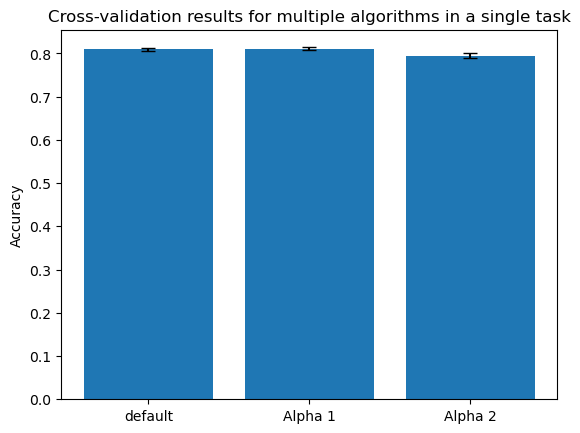

In [ ]:
plot_cv_estimates(results)

In [ ]:
 # Plot the results using a bar plot with error bars and color-coded with the relation between p-value and alpha (default value is 0.05)
def plot_cv_stat(results_cv, alpha=0.05, baseline=None, stat_test="ttest", metric='accuracy'):

    if baseline is None:
        baseline=results_cv.columns[0]

    baseline_res = results_cv[baseline]

    other_res = results_cv.drop(baseline,axis=1)

    fig, ax = plt.subplots()
    ax.bar(baseline,baseline_res.mean(), yerr=baseline_res.std() / np.sqrt(baseline_res.shape[0]), capsize=5, color="grey")

    cols = []
    for alg in other_res:
        # Compute the statistical significance of each algorithm with respec
        if stat_test == 'ttest':
            test_stat, test_p = ss.ttest_rel(other_res[alg], baseline_res)
        elif stat_test == 'wilcoxon':
            test_stat, test_p = ss.wilcoxon(other_res[alg],baseline_res)
        if test_p < alpha:
            cols = cols + ['purple']
        else:
            cols = cols + ['blue']

    ax.bar(other_res.columns, other_res.mean(), yerr=other_res.std() / np.sqrt(other_res.shape[0]), capsize=5, color=cols)
    ax.set_ylabel(metric)
    ax.set_title("Cross-validation results for multiple algorithms in a single task")
    plt.show()


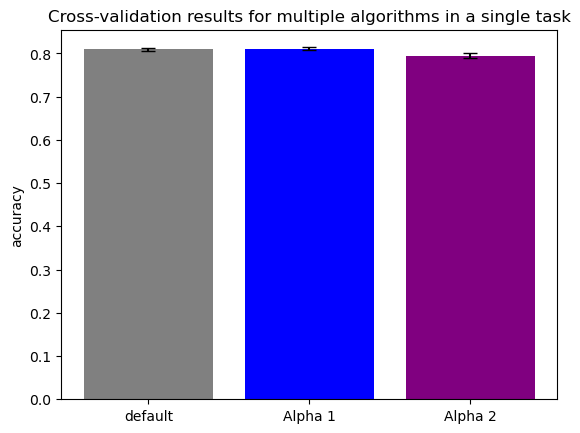

In [ ]:
plot_cv_stat(results)